In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [41]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


Files already downloaded and verified


In [42]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)


In [43]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified


In [56]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)


In [37]:
# Creates a tuple of the classes
classes = ('plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck')

     horse      horse       ship        car


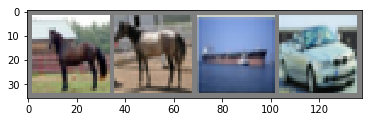

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    
# Get some random images
data_iter = iter(trainloader) # creates an iterable object
images, labels = data_iter.next()

# Show images
imshow(torchvision.utils.make_grid(images))
print(' '.join('%10.5s' % classes[labels[j]] for j in range(4)))

In [39]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
net = Net()

In [40]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [55]:
print('Start of training')
optimizer.zero_grad()
for epoch in range(2):
    running_loss = 0.0
    for index, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        # zeroing the parameter gradients
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if index % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, index+1, running_loss/2000))
            running_loss = 0.0
            
print('Finished Training')
        

Start of training
[1,  2000] loss: 0.867
[1,  4000] loss: 0.914
[1,  6000] loss: 0.924
[1,  8000] loss: 0.923
[1, 10000] loss: 0.937
[1, 12000] loss: 0.970
[2,  2000] loss: 0.844
[2,  4000] loss: 0.862
[2,  6000] loss: 0.875
[2,  8000] loss: 0.922
[2, 10000] loss: 0.916
[2, 12000] loss: 0.910
Finished Training


GroundTruth:    cat  ship  ship plane


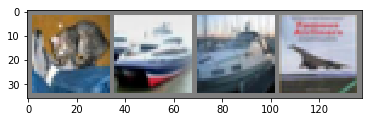

In [58]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4))) # Print the labels of the 4 images (batch_size = 4)

In [66]:
outputs = net(images)

_, predicted = torch.max(outputs, 1) # Get the maximum value 

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship  ship


In [70]:
correct = 0
total = 0 
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10,000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10,000 test images: 62 %


In [77]:
class_correct = list(0. for i in range(10)) # Sets index 0 to 9 to zeroes 
class_total = list(0. for i in range(10)) # Sets index 0 to 9 to zeroes

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
            
            
for i in range(10):
    print('Accuracy of %5s : %2d %% ' % (classes[i], 100* class_correct[i] / class_total[i]))

Accuracy of plane : 70 % 
Accuracy of   car : 78 % 
Accuracy of  bird : 41 % 
Accuracy of   cat : 49 % 
Accuracy of  deer : 59 % 
Accuracy of   dog : 48 % 
Accuracy of  frog : 64 % 
Accuracy of horse : 69 % 
Accuracy of  ship : 81 % 
Accuracy of truck : 60 % 


In [78]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [79]:
# Brings the network to the GPU and convert their parameters and buffers to CUDA tensors

net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [80]:
inputs, labels = inputs.to(device), labels.to(device)